# 한글폰트적용

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [ ]:
# 런타임 재시작
import os

os.kill(os.getpid(), 9)

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

#그래픽카드 중고가격 크롤링 -> csv 파일로 저장

>nvidia_gpu

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

# 칩셋, 날짜선택 안한 기본 url
baseUrl = urlopen("https://usedking.xyz/gpu/")

# 칩셋 선택 select태그 가져와서 chipsetList 만들기
ext_data = BeautifulSoup(baseUrl, 'html.parser')
selectValue = ext_data.find('select').get_text()

# 줄바꿈 기준으로 스플릿 후 쓸데없는 값 제거
chipsetList = selectValue.split("\n")
del chipsetList[0:2]
del chipsetList[-1]

# 칩셋리스트를 통해 전체 칩셋에 대한 데이터 크롤링
table_list = []
for chip in chipsetList:
  url = "https://usedking.xyz/gpu/?select_gpu={0}&days=all".format(chip)
  tables = pd.read_html(url)

  # 테이블이 존재하는지 확인하고 작업 수행
  if len(tables) > 0:
    table_list.append(tables[0])
  else:
    print("해당 {0}에 대한 거래정보 없음".format(chip))

#gpu_price_df에 table_list 합치기
gpu_price_df = pd.concat(table_list, ignore_index=True)

#csv파일로 gpu_pirce_df저장하기
gpu_price_df.to_csv('/content/gpu_nvidia.csv', encoding='utf-8')

>radeon_gpu

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

# 칩셋, 날짜선택 안한 기본 url
baseUrl = urlopen("https://usedking.xyz/radeon/")
# 칩셋 선택 select태그 가져와서 chipsetList 만들기
ext_data = BeautifulSoup(baseUrl, 'html.parser')
selectValue = ext_data.find('select').get_text()
# 줄바꿈 기준으로 스플릿 후 쓸데없는 값 제거
chipsetList = selectValue.split("\n")
del chipsetList[0:2]
del chipsetList[-1]

table_list = []
for chip in chipsetList:
  url = "https://usedking.xyz/radeon/?select_gpu={0}&days=all".format(chip)
  tables = pd.read_html(url)

  # 테이블이 존재하는지 확인하고 작업 수행
  if len(tables) > 0:
    table_list.append(tables[0])
  else:
    print("해당 {0}에 대한 거래정보 없음".format(chip))

#gpu_price_df에 table_list 합치기
gpu_price_df = pd.concat(table_list, ignore_index=True)

#csv파일로 gpu_pirce_df저장하기
gpu_price_df.to_csv('/content/gpu_radeon.csv', encoding='utf-8')

#csv 파일 전처리

In [156]:
import pandas as pd

gpu_nvidia_df = pd.read_csv('/content/gpu_nvidia.csv', encoding = 'utf-8')
gpu_radeon_df = pd.read_csv('/content/gpu_radeon.csv', encoding = 'utf-8')

# 2개 제조사 데이터 연결
gpu_concat_df = pd.concat([gpu_nvidia_df, gpu_radeon_df], ignore_index=True)

# 데이터 확인
print(gpu_concat_df.head())
print(gpu_concat_df.shape)
print(gpu_concat_df.info())

# 컬럼명 재설정
gpu_concat_df.rename(columns = {'Unnamed: 0' : 'no', 'No' : 'trade_id', 'cost' : 'price'}, inplace = True)

# 인덱스 재설정
gpu_concat_df.reset_index(drop=True, inplace=True)
gpu_concat_df.index.name = 'trade_no'

# 거래제목을 기준으로 중복된 값 제거
gpu_concat_df['subj'].drop_duplicates()

# 결측치 확인
print(gpu_concat_df.isnull().sum(axis=0))

# 필요없는 컬럼 삭제
gpu_concat_df.drop(['no', 'subj'], axis = 1, inplace = True)
gpu_concat_df

# 거래일 값 형식변경 및 필요한 형태로 새 열 생성
gpu_concat_df['trade_date'] = pd.to_datetime(gpu_concat_df['trade_date'])
gpu_concat_df['yyyy-mm'] = gpu_concat_df['trade_date'].dt.strftime('%Y-%m')
gpu_concat_df['week'] = gpu_concat_df['trade_date'].dt.to_period('W-Mon').astype(str).str.split('/').str[0].str.replace("-","")

# 전처리 후 데이터 확인 및 저장
gpu_concat_df.to_csv('/content/gpu_concat.csv', encoding='utf-8')
gpu_concat_df

   Unnamed: 0    No  chipset     cost  \
0           0  1147  rtx4090  2550000   
1           1  1146  rtx4090  2500000   
2           2  1145  rtx4090  2500000   
3           3  1144  rtx4090  2850000   
4           4  1143  rtx4090  2600000   

                                                subj  trade_date  
0                                         만리 rtx4090  2023-11-28  
1                 대구직) MSI RTX4090 GAMING TRIO X 미개봉  2023-11-28  
2                                     4090 sg 갤럭시 판매  2023-11-28  
3                                     4090 넵튠 택포 285  2023-11-28  
4  기가바이트 RTX4090 어로스마스터 팝니다 Gigabyte Aorus Master...  2023-11-28  
(15270, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15270 entries, 0 to 15269
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15270 non-null  int64 
 1   No          15270 non-null  int64 
 2   chipset     15270 non-null  object
 3   cost        15270 non-null 

,trade_id,chipset,price,trade_date,yyyy-mm,week
trade_no,,,,,,
0,1147,rtx4090,2550000,2023-11-28,2023-11,20231128
1,1146,rtx4090,2500000,2023-11-28,2023-11,20231128
2,1145,rtx4090,2500000,2023-11-28,2023-11,20231128
3,1144,rtx4090,2850000,2023-11-28,2023-11,20231128
4,1143,rtx4090,2600000,2023-11-28,2023-11,20231128
...,...,...,...,...,...,...
15265,5,vega64,200000,2022-10-21,2022-10,20221018
15266,4,vega64,400000,2022-10-21,2022-10,20221018
15267,3,vega64,270000,2022-10-09,2022-10,20221004


#채굴에 자주사용되는 gpu선별

> 칩셋별 해시레이트, 채산성 데이터 수집
> * 해시레이트? 초당 해시값 계산 횟수의 총합. 즉, 주어진 채굴기가 작동하는 속도

In [157]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# 사이트 url
url = "https://dongdinolife.tistory.com/entry/%EA%B7%B8%EB%9E%98%ED%94%BD%EC%B9%B4%EB%93%9C-%EC%A2%85%EB%A5%98%EB%B3%84%EB%A1%9C-%EC%9D%B4%EB%8D%94%EB%A6%AC%EC%9B%80-%EC%B1%84%EA%B5%B4-%ED%95%B4%EC%8B%9C-%EA%B0%92-%EC%A0%95%EB%A6%AC%ED%95%B4%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4"

# url로 요청
response = requests.get(url)

# response 코드가 200이면(연결성공) 테이블 데이터 가져오기
if response.status_code == 200:
  soup = BeautifulSoup(response.text, 'html.parser')
  table_list = []
  tables = pd.read_html(str(soup))

  for idx, table in enumerate(tables):
    # 테이블 값 확인후 인덱스 행 제외 후 append
    table_list.append(table.iloc[1:])

# 필요없는 테이블 제거
table_list.pop()

# gpu 해시레이트 및 채산성 데이터프레임 생성
gpu_spec_df = pd.concat(table_list, ignore_index=True)

# 컬럼명 재설정
gpu_spec_df.rename(columns = {0 : 'chipset', 1 : 'hashrate', 2 : 'payability'}, inplace = True)

# hashrate, payability 값 수정
gpu_spec_df['hashrate'] = gpu_spec_df['hashrate'].str.replace("29 ~31", "30").str.replace("Mh/s", "")
print(gpu_spec_df['hashrate'].unique())

gpu_spec_df['payability'] = gpu_spec_df['payability'].str.replace("약 ","").str.replace("만원", "0000")
print(gpu_spec_df['payability'].unique())
gpu_spec_df['payability'] = gpu_spec_df['payability'].str.replace("만 ","").str.replace("천원", "000")
print(gpu_spec_df['payability'].unique())


# hashrate, payability 타입 변환
gpu_spec_df['hashrate'] = gpu_spec_df['hashrate'].astype(float)
gpu_spec_df['payability'] = gpu_spec_df['payability'].astype(int)

# csv파일로 저장
gpu_spec_df.to_csv('/content/gpu_spec.csv', encoding='utf-8')
gpu_spec_df

['23' '26' '30' '34' '41' '29' '28' '40' '42' '56' '48' '60' '93' '120'
 '55' '43' '63']
['60000' '70000' '8만 5천원' '90000' '120000' '80000' '7만 8천원' '110000'
 '150000' '130000' '180000' '270000' '360000' '200000']
['60000' '70000' '85000' '90000' '120000' '80000' '78000' '110000'
 '150000' '130000' '180000' '270000' '360000' '200000']


,chipset,hashrate,payability
0,GTX 1060 (6GB),23.0,60000
1,GTX 1070,26.0,70000
2,GTX 1070Ti,30.0,85000
3,GTX 1080,34.0,90000
4,GTX 1080Ti,41.0,120000
5,GTX 1660,23.0,60000
6,GTX 1660 Super,29.0,80000
7,GTX 1660 Ti,28.0,78000
8,RTX 2060,30.0,85000
9,RTX 2060 Super,40.0,110000


> 칩셋별 해시레이트, 채산성 확인

<ipython-input-158-0a2663d0bbc7>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(new_yticklabels)


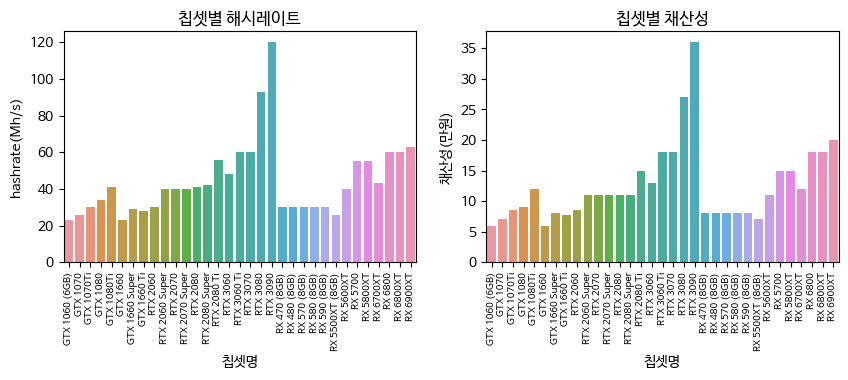

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 3))

# subplot(2, 2) 생성
ax1=plt.subplot(1, 2, 1)
ax2=plt.subplot(1, 2, 2)

# 1번 그래프, 칩셋별 해시레이트
sns.barplot(data=gpu_spec_df, x='chipset', y='hashrate', ax=ax1)
ax1.set_xlabel('칩셋명')
ax1.set_ylabel('hashrate(Mh/s)')
ax1.set_title('칩셋별 해시레이트')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize = 7)

# 2번 그래프, 칩셋별 채산성
sns.barplot(data=gpu_spec_df, x='chipset', y='payability', ax=ax2)
ax2.set_xlabel('칩셋명')
ax2.set_ylabel('채산성(만원)')
ax2.set_title('칩셋별 채산성')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize = 7)
# y축 눈금 수정
new_yticklabels = [int(x/10000) for x in ax2.get_yticks()]
ax2.set_yticklabels(new_yticklabels)

plt.show()

> 칩셋별 거래량 확인

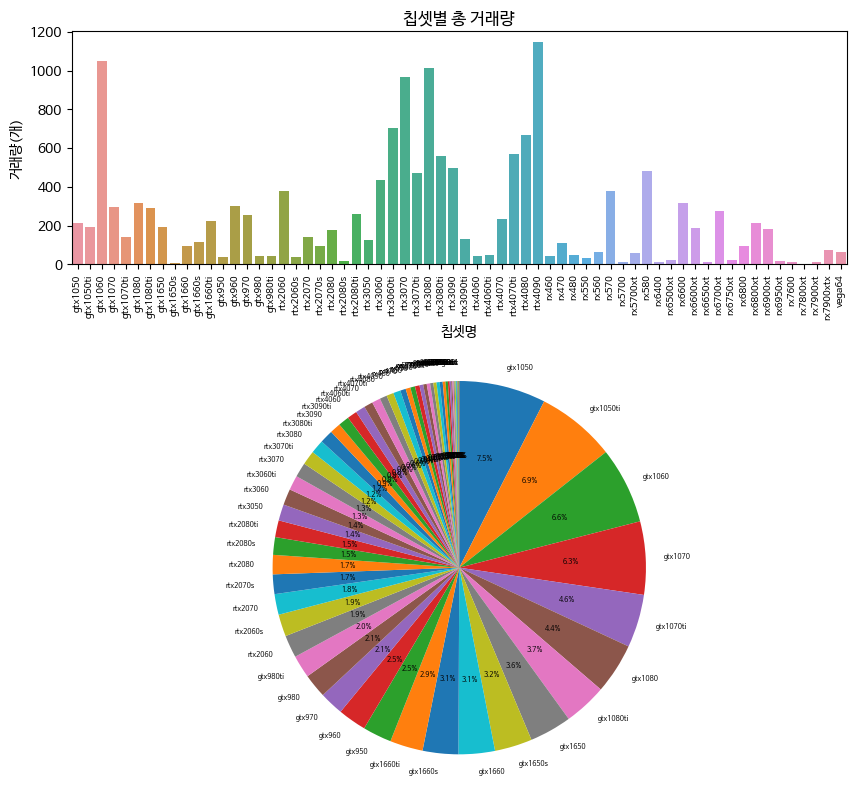

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# 칩셋별 거래량 카운트
chipset_count = gpu_concat_df.groupby(['chipset']).size().reset_index(name='count')

chipset_count_sort = chipset_count.sort_values(by='count', ascending=False)


# 서브플롯 생성 및 사이즈 조절
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 2]})

# 1번 그래프
sns.barplot(data=chipset_count, x='chipset', y='count', ax=ax1)
ax1.set_xlabel('칩셋명')
ax1.set_ylabel('거래량(개)')
ax1.set_title('칩셋별 총 거래량')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize = 7)

# 2번 그래프
ax2.pie(chipset_count_sort['count'], labels=chipset_count['chipset'],
        autopct='%.1f%%', startangle=90, counterclock=False, textprops={'size':5})

plt.show()

> 해시레이트, 거래량 순위

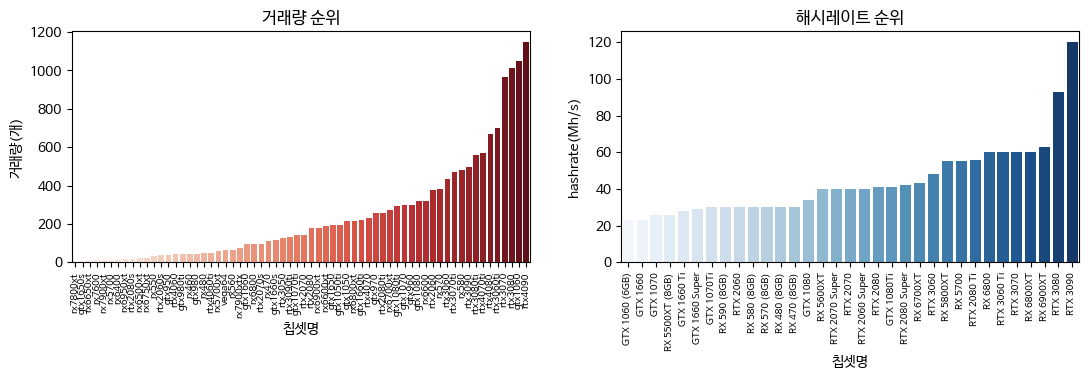

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(13, 3))

# subplot(1, 2) 생성
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# 1번 그래프, 칩셋별 거래량
sorted_df = chipset_count.sort_values(by='count', ascending=True)
sns.barplot(data=sorted_df, x='chipset', y='count', order=sorted_df['chipset'], palette = 'Reds', ax=ax1)
ax1.set_xlabel('칩셋명')
ax1.set_ylabel('거래량(개)')
ax1.set_title('거래량 순위')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=7)

# 2번 그래프, 칩셋별 해시레이트
sorted_df = gpu_spec_df.sort_values(by='hashrate', ascending=True)
sns.barplot(data=sorted_df, x='chipset', y='hashrate', order=sorted_df['chipset'], palette = 'Blues', ax=ax2)
ax2.set_xlabel('칩셋명')
ax2.set_ylabel('hashrate(Mh/s)')
ax2.set_title('해시레이트 순위')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=7)

plt.show()

# 거래량, 해시레이트 등 조건을 고려하여 가상화폐 채굴에 자주 쓰이는 GPU 선별

In [161]:
import pandas as pd

# 제조사별 칩셋으로 그룹화
grouped_chipset = gpu_concat_df.groupby(['chipset'])

# 그룹화 된 데이터를 concat하기 위한 임시 리스트
temp_list = [grouped_chipset.get_group('rx470'), grouped_chipset.get_group('rx480'),
             grouped_chipset.get_group('rx580'), grouped_chipset.get_group('rx5700'),
             grouped_chipset.get_group('rx5700xt'), grouped_chipset.get_group('rx6800'),
             grouped_chipset.get_group('gtx1060'), grouped_chipset.get_group('gtx1070'),
             grouped_chipset.get_group('gtx1080ti'), grouped_chipset.get_group('gtx1660ti'),
             grouped_chipset.get_group('rtx3060ti'), grouped_chipset.get_group('rtx3070')]

gpu_mostUsed_df = pd.concat(temp_list, ignore_index=True)

gpu_mostUsed_df.to_csv('/content/gpu_mostUsed.csv', encoding='utf-8')
gpu_mostUsed_df

,trade_id,chipset,price,trade_date,yyyy-mm,week
0,111,rx470,40000,2023-11-07,2023-11,20231107
1,110,rx470,50000,2023-10-26,2023-10,20231024
2,109,rx470,25000,2023-10-06,2023-10,20231003
3,108,rx470,45000,2023-10-01,2023-10,20230926
4,107,rx470,40000,2023-09-19,2023-09,20230919
...,...,...,...,...,...,...
4328,5,rtx3070,340000,2022-12-26,2022-12,20221220
4329,4,rtx3070,450000,2022-12-26,2022-12,20221220
4330,3,rtx3070,455000,2022-12-26,2022-12,20221220
4331,2,rtx3070,420000,2022-12-26,2022-12,20221220


# 선별된 데이터 전처리

In [162]:
# 위에서 데이터를 로드하고 처리한 부분
gpu_mostUsed_df

# 칩셋, 거래일 별 가격 평균
mean_price = gpu_mostUsed_df.groupby(['chipset', 'yyyy-mm', 'week'])['price'].mean()
mean_price = mean_price.round().astype(int)

print(mean_price)

# 가격이 평균보다 기준치 이상일 때 데이터 값 전리
for chipset, month, week in mean_price.index:
    cursor = (gpu_mostUsed_df['chipset'] == chipset) & (gpu_mostUsed_df['yyyy-mm'] == month) & (gpu_mostUsed_df['week'] == week)
    over_value = gpu_mostUsed_df.loc[cursor, 'price'] > 1.5 * mean_price.loc[(chipset, month, week)]
    gpu_mostUsed_df.loc[cursor & over_value, 'price'] = mean_price.loc[(chipset, month, week)] * 0.8

gpu_mostUsed_df.to_csv('/content/gpu_mostUsed.csv', encoding='utf-8')
gpu_mostUsed_df

chipset  yyyy-mm  week    
gtx1060  2022-12  20221220     80269
                  20221227     82207
         2023-01  20221227     86714
                  20230103     73488
                  20230110     75270
                               ...  
rx6800   2023-11  20231031    324500
                  20231107    310000
                  20231114    316667
                  20231121    336667
                  20231128    303000
Name: price, Length: 617, dtype: int64


,trade_id,chipset,price,trade_date,yyyy-mm,week
0,111,rx470,40000.0,2023-11-07,2023-11,20231107
1,110,rx470,50000.0,2023-10-26,2023-10,20231024
2,109,rx470,25000.0,2023-10-06,2023-10,20231003
3,108,rx470,45000.0,2023-10-01,2023-10,20230926
4,107,rx470,40000.0,2023-09-19,2023-09,20230919
...,...,...,...,...,...,...
4328,5,rtx3070,340000.0,2022-12-26,2022-12,20221220
4329,4,rtx3070,450000.0,2022-12-26,2022-12,20221220
4330,3,rtx3070,455000.0,2022-12-26,2022-12,20221220
4331,2,rtx3070,420000.0,2022-12-26,2022-12,20221220


# 칩셋별 가격 그래프

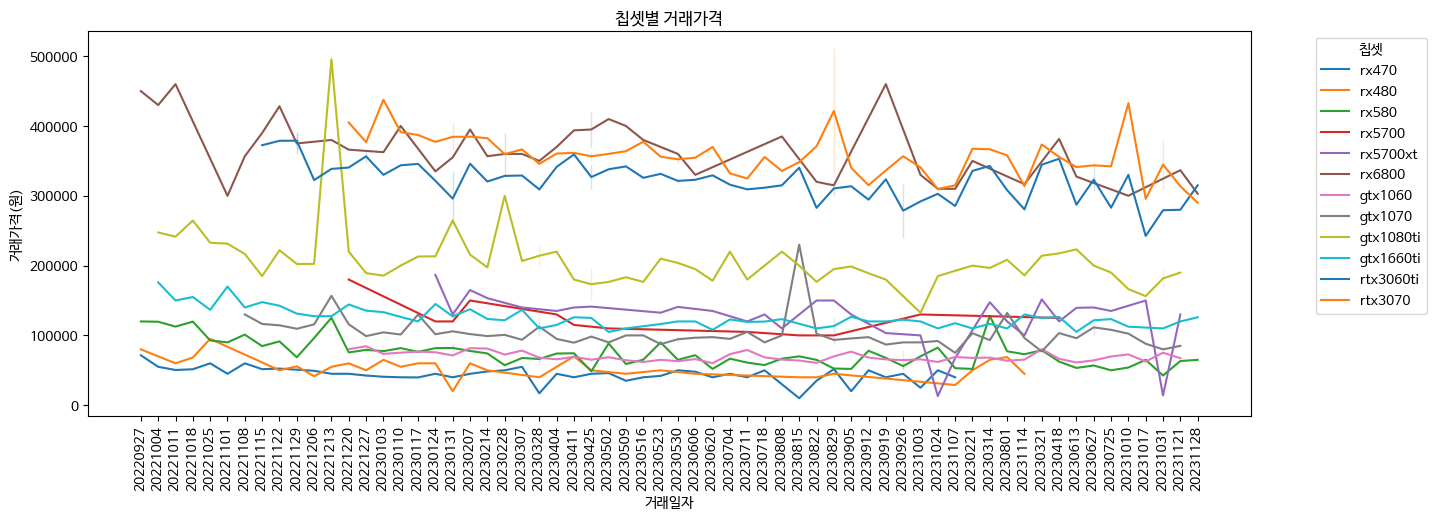

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 칩셋, 거래일 별 거래가격 그래프를 위한 데이터 뽑아내기
graph_data = pd.DataFrame(index=mean_price.index)
graph_data['price'] = mean_price.values

#print(graph_data)

# 그래프 속성
plt.figure(figsize=(15, 5))
plt.xlabel('거래일자')
plt.ylabel('거래가격(원)')
plt.title('칩셋별 거래가격')

# 칩셋명 리스트
chipset_list = gpu_mostUsed_df['chipset'].unique()

#print(chipset_list)
for chipset in chipset_list:
    fi = sns.lineplot(data=graph_data.loc[chipset], x='week', y='price', label=chipset)

# 그래프 표시
plt.xticks(rotation=90)
plt.legend(title='칩셋', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 칩셋별 거래량 그래프

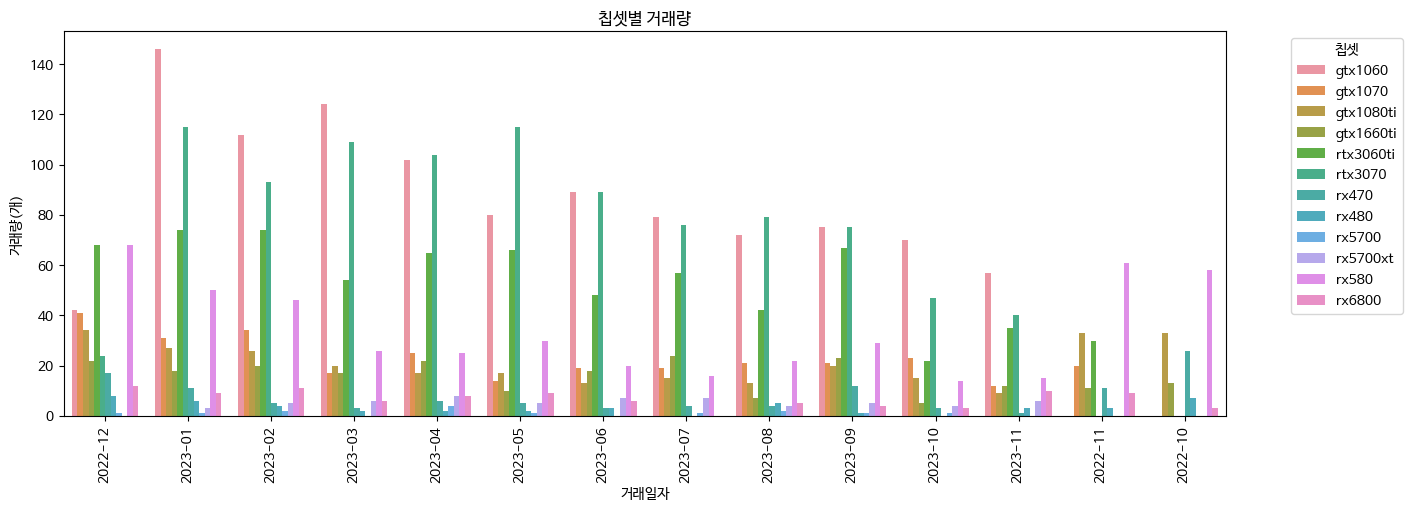

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 칩셋, 거래일자로 묶은 거래량 데이터
count_data = gpu_mostUsed_df.groupby(['chipset', 'yyyy-mm']).size().reset_index(name='count')

# 그래프 속성
plt.figure(figsize=(15, 5))

plt.title('칩셋별 거래량')

# 그래프 그리기 (누적 막대 그래프)
sns.barplot(data=count_data, x='yyyy-mm', y='count', hue='chipset', dodge=True)

# 그래프 표시
plt.xlabel('거래일자')
plt.ylabel('거래량(개)')
plt.xticks(rotation=90)
plt.legend(title='칩셋', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

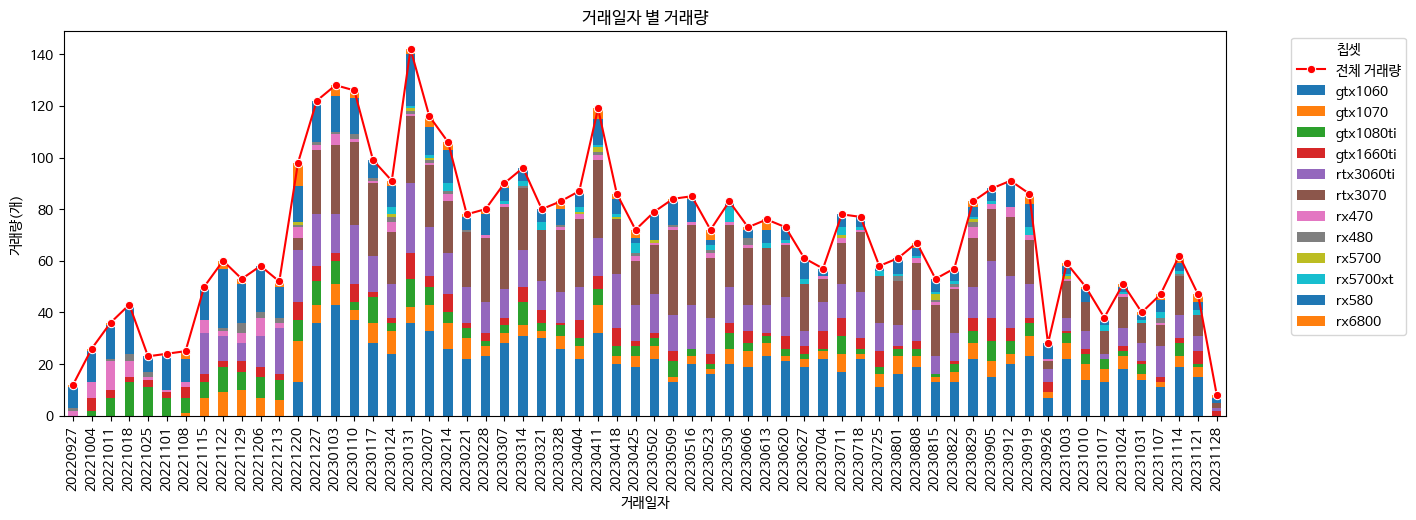

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 칩셋, 거래일자로 묶은 거래량 데이터
count_data = gpu_mostUsed_df.groupby(['week', 'chipset']).size().unstack().reset_index()

# 누적 막대 그래프 그리기
count_data.set_index('week').plot(kind='bar', stacked=True, figsize=(15,5))

# 누적 꺾은선 그래프
sns.lineplot(data=gpu_mostUsed_df.groupby('week').size().reset_index(name='total_count'),
             x='week', y='total_count', color='red', marker='o', label='전체 거래량')

# 그래프 표시
plt.title('거래일자 별 거래량')
plt.xlabel('거래일자')
plt.ylabel('거래량(개)')
plt.xticks(rotation=90)
plt.legend(title='칩셋', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()